# Introduction
- In this notebook we will create a Machine Learning model to predict death situation of COVID-19.
 
## About The Dataset
#### This dataset contains an enormous number of anonymized patient-related information, including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means “yes” and 2 means “no”. Values as 97 and 99 are missing data.
- sex: female or male
- age: of the patient.
- classification: COVID-19 test findings. Values 1-3 mean that the patient was diagnosed with COVID-19 in different degrees. 4 or higher means that the patient is not a carrier of COVID-19 or that the test is inconclusive.
- patient type: hospitalized or not hospitalized.
- pneumonia: whether the patient already has air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient has been admitted to an Intensive Care Unit.
- death: indicates whether the patient died or recovered.

#### The notebook includes:
- Data Importing
- Data Preprocessing
- Data Preparing & Cleaning
- Missing Value Analysis
- Data Visualization
- Future Selection
- Creating Model
- Model Analysis
- Improving Model
- Solving Imbalance Dataset Problem With Undersampling

# Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import time

import warnings
warnings.filterwarnings("ignore")

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# Overview Dataset

In [2]:
covid = pd.read_csv("Covid Data.csv")
print("Shape of dataset:\t", covid.shape)
covid.head()

Shape of dataset:	 (1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
covid.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [5]:
print("\tTHE NUMBER OF UNIQUE VALUES BY COLUMNS:")
covid.nunique()

	THE NUMBER OF UNIQUE VALUES BY COLUMNS:


USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

In [6]:
print("Number of NaN values:\t", covid.isna().sum().sum())

Number of NaN values:	 0


- We have no NaN values but we will have missing values.

In [7]:
covid.DATE_DIED.value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [8]:
covid.PNEUMONIA.value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

In [9]:
covid.PREGNANT.value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [10]:
covid.INTUBED.value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

**Creating table for feature with missing value percentage**

In [11]:
perc=[]
for col in list(covid.columns):
   perc.append(round(len(covid[(covid[col]==97)| (covid[col]==98) | (covid[col]==98)])/len(covid)*100,2))

In [12]:
((pd.DataFrame([covid.columns, perc]).T).rename(columns={0: "Feature", 1: "Percentage"})).sort_values(by="Percentage", ascending=False)

,Feature,Percentage
20,ICU,80.92
5,INTUBED,80.92
8,PREGNANT,50.28
14,OTHER_DISEASE,0.48
12,INMSUPR,0.32
9,DIABETES,0.32
18,TOBACCO,0.31
13,HIPERTENSION,0.3
17,RENAL_CHRONIC,0.29
16,OBESITY,0.29


### **INFERENCE:**
1. We have no NaN values but values 97, 98 and 99 are considered as missing values.
2. We have some features that we expect them to have just 2 unique values but we see that these features have 3 or 4 unique values. For example the feature "PNEUMONIA" has 3 unique values (1, 2, 99) and "99" represents NaN values. Hence we will just take the rows that includes 1 and 2 values.
3. In "DATE_DIED" column, we have 971633 "9999-99-99" values which represent alive patients so i will take this feature as a "DEATH" that includes wether the patient died or not.

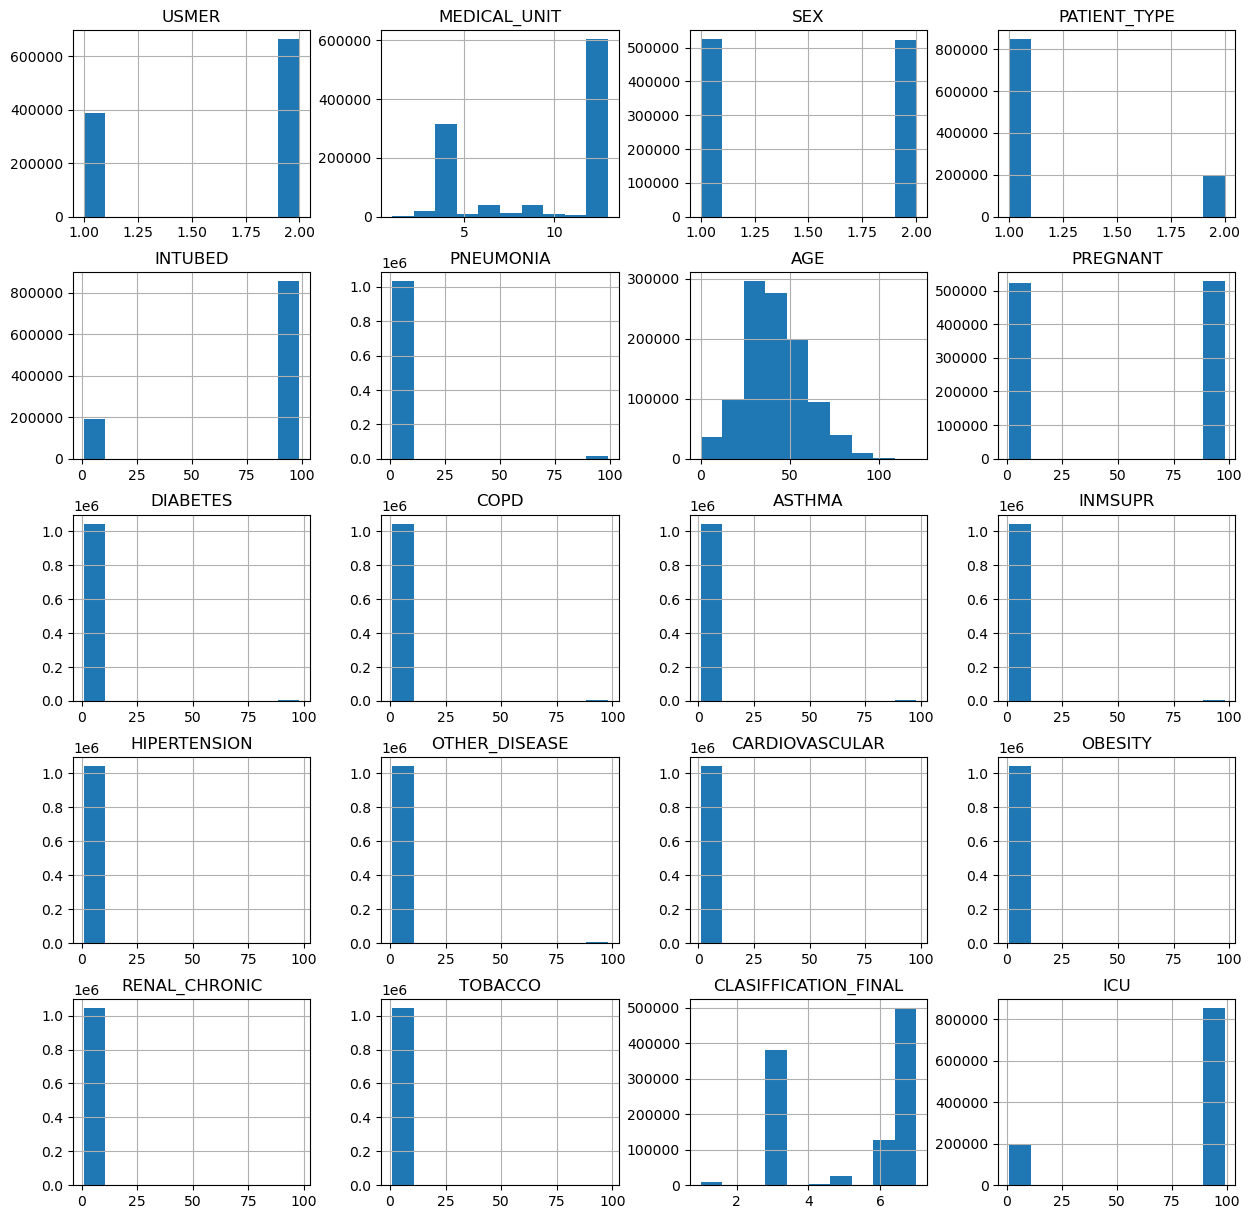

In [13]:
covid.hist(figsize=(15,15));

# Data Preprocessing

## Get rid of missing values, except for INTUBED, PREGNANT, ICU columns since they have too many

In [14]:
covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [15]:
cols = ['PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION', 
        'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO']
for col in cols :
    covid = covid[(covid[col] == 1)|(covid[col] == 2)]

## Pregnant-Sex Bar Plot

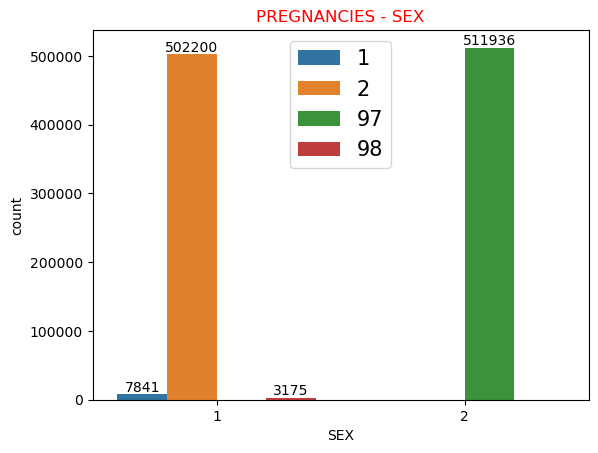

In [16]:
plt.figure()
ax = sns.countplot(covid.SEX, hue=covid.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX", color="red")
plt.legend(loc='upper center', fontsize=15)
plt.show()

- We see that the 'male' column has 511936 missing values which are supposed to be 'no' as man can not be pregnant. So I decide to change these missing values to '2' meaning no.

In [17]:
# Converting 97 to 2
covid.PREGNANT = covid.PREGNANT.replace(97, 2)
# Remove missing values
covid = covid[(covid.PREGNANT ==1 ) | (covid.PREGNANT == 2)]
covid.PREGNANT.value_counts()

2    1014136
1       7841
Name: PREGNANT, dtype: int64

## Missing value analysis of “INTUBED” feature

Text(0.5, 1.0, 'Count of Intubed')

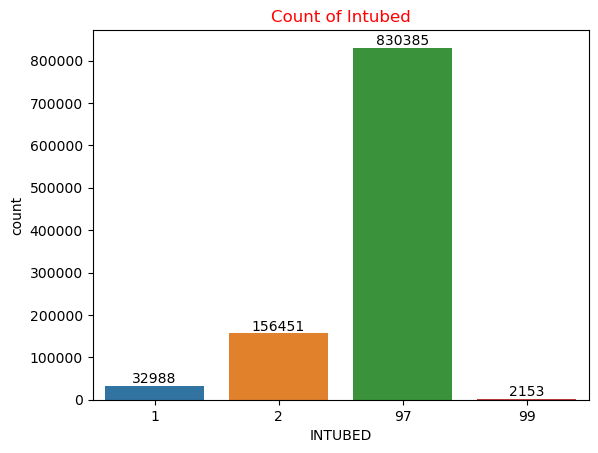

In [18]:
ax = sns.countplot(covid.INTUBED)
plt.bar_label(ax.containers[0])
plt.title("Count of Intubed", color="red")

## Missing value analysis of “ICU” feature

Text(0.5, 1.0, 'Count of ICU')

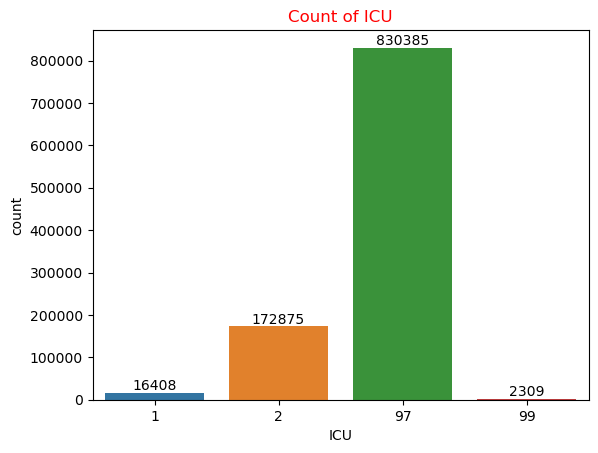

In [19]:
ax = sns.countplot(covid.ICU)
plt.bar_label(ax.containers[0])
plt.title("Count of ICU", color="red")

## Preparing “DATE_DIED” column

In [20]:
# If we have “9999-99-99” values, that means this patient is alive.

covid["DEATH"] = [2 if each == "9999-99-99" else 1 for each in covid.DATE_DIED]
covid['DEATH'].value_counts()

2    947320
1     74657
Name: DEATH, dtype: int64

#### **COMMENT**:
- In the “INTUBED” and “ICU” features, there are too many missing values, so I will drop them. Also, we don't need “DATE_DIED” column anymore because we used this feature as a “DEATH” feature.

## Droping the columns

In [21]:
covid.drop(columns=["INTUBED", "ICU", "DATE_DIED"], inplace=True)

In [22]:
print("Size of dataset:\t", covid.shape, )
print("\n\tTHE NUMBER OF UNIQUE VALUES BY COLUMNS:")
covid.nunique()

Size of dataset:	 (1021977, 19)

	THE NUMBER OF UNIQUE VALUES BY COLUMNS:


USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
PNEUMONIA                 2
AGE                     121
PREGNANT                  2
DIABETES                  2
COPD                      2
ASTHMA                    2
INMSUPR                   2
HIPERTENSION              2
OTHER_DISEASE             2
CARDIOVASCULAR            2
OBESITY                   2
RENAL_CHRONIC             2
TOBACCO                   2
CLASIFFICATION_FINAL      7
DEATH                     2
dtype: int64

- As we see, we have just one numeric feature which is called “AGE” the rest of them are categorical.

# Data Visualization

Text(0.5, 1.0, 'Death Distribution')

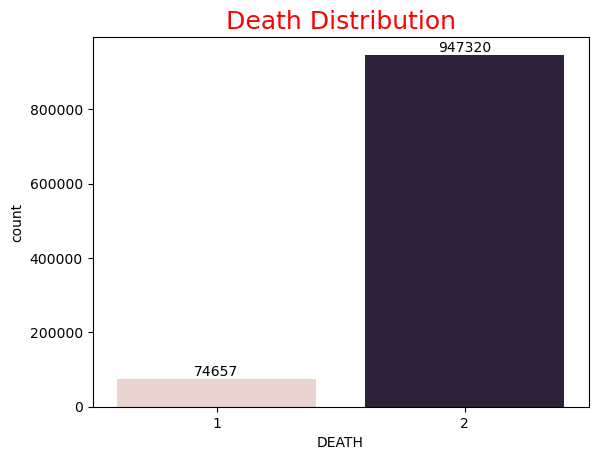

In [23]:
ax = sns.countplot(covid.DEATH, palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0]) 
plt.title("Death Distribution", fontsize=18, color="red")

- The values are distributed unbalanced in target column. This will probably cause an imbalance problem. Nonetheless i want you to see the problem. Hence i will go ahead for now and if we meet this problem i will try to figure it out.

Text(0.5, 1.0, 'Age Distribution')

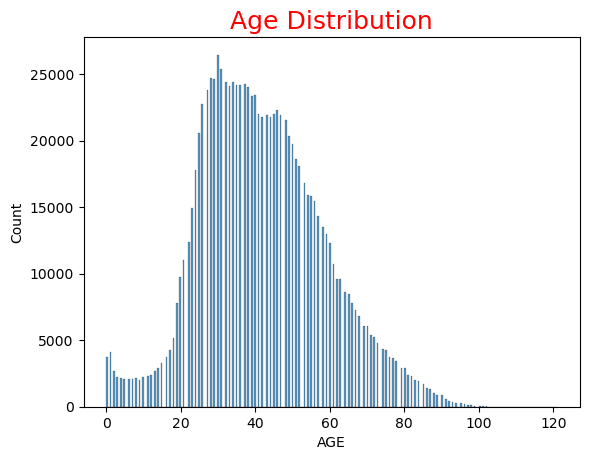

In [24]:
sns.histplot(x=covid.AGE)
plt.title("Age Distribution", color="red", fontsize=18)

- Patients are roughly between 20-60 years old.

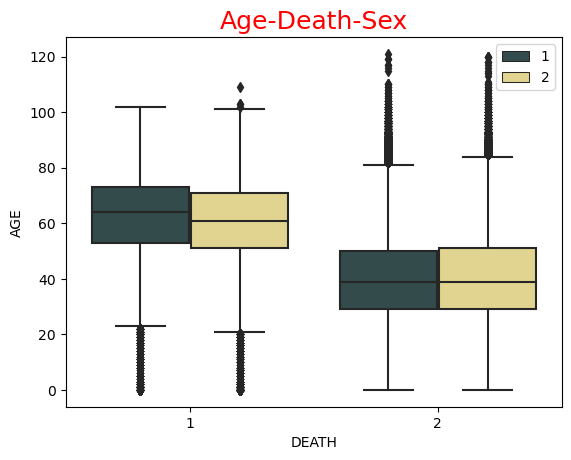

In [25]:
sns.boxplot(x="DEATH", y="AGE",hue="SEX",data=covid,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-Death-Sex",fontsize=18, color="red")
plt.legend(loc="best");

- The older patients are more likely to die compare to younger ones.
- There is no serious difference between males and females in terms of average rate of patients.

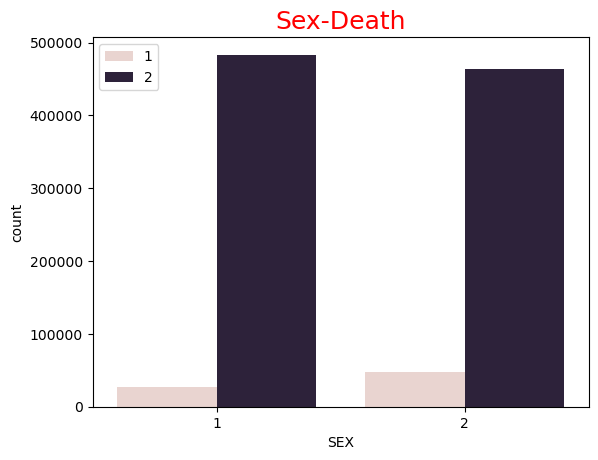

In [26]:
sns.countplot(covid.SEX, hue=covid.DEATH, palette=sns.cubehelix_palette(2))
plt.title("Sex-Death", fontsize=18, color="red")
plt.legend(loc="best")

- Males are more likely to die of COVID-19 compared to females.

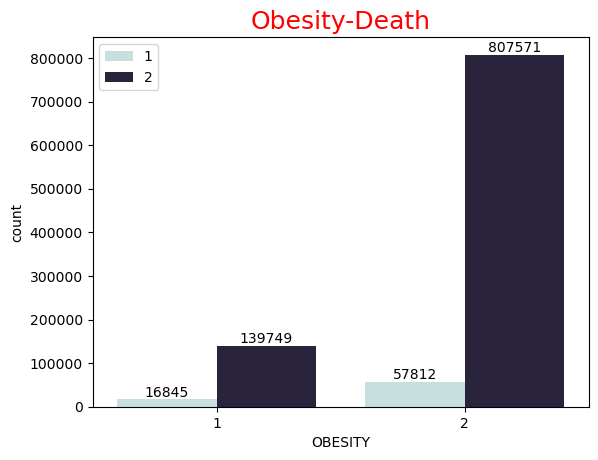

In [27]:
ax=sns.countplot(covid.OBESITY,hue=covid.DEATH, palette='ch:start=.2,rot=-.3')
plt.title("Obesity-Death",fontsize=18, color="red")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.legend(loc="best");

- Obese patients are more likely to die from COVID-19 compared to non-obese patients.

Text(0.5, 1.0, 'Correlation Between Features')

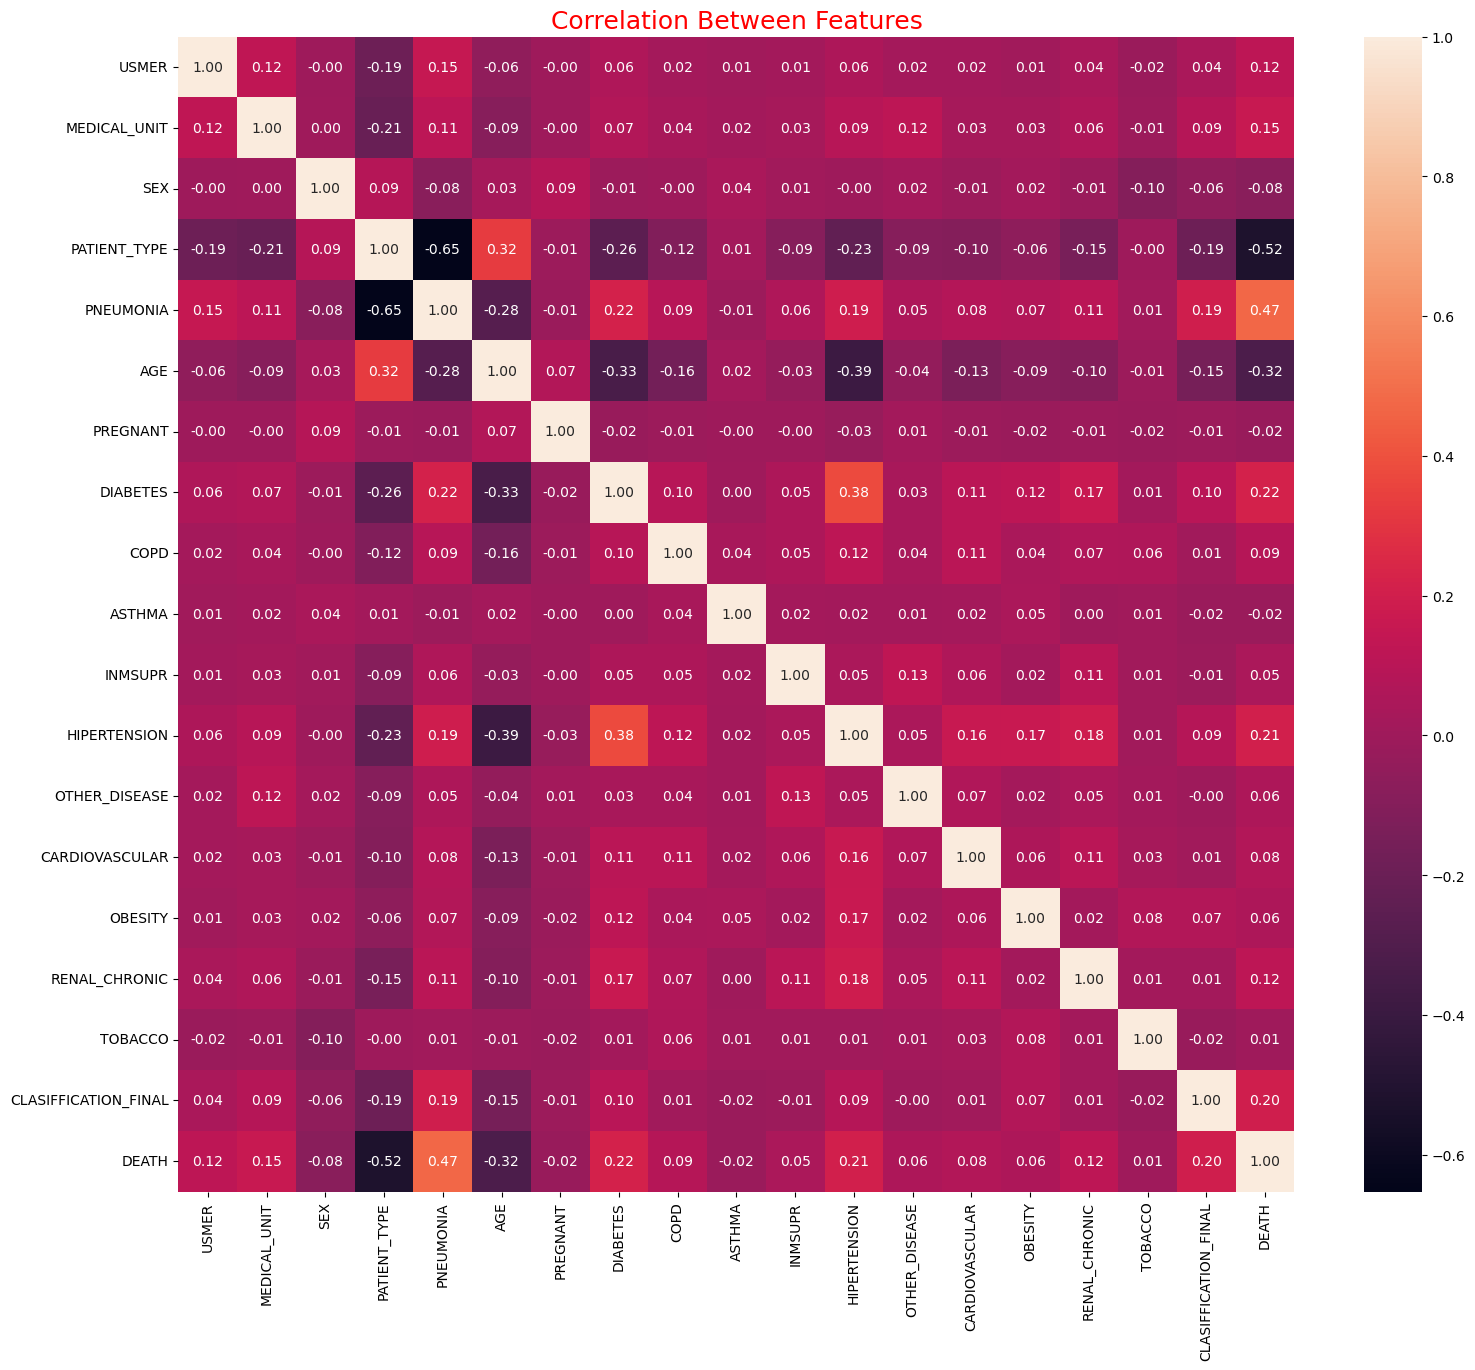

In [28]:
plt.figure(figsize=(18,15))
sns.heatmap(covid.corr(), annot=True, fmt=".2f")
plt.title("Correlation Between Features", fontsize=18, color="red")

# Future Selection

- Drop the features that have low correlation with “DEATH” feature.

In [29]:
unrelevant_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

covid.drop(columns=unrelevant_columns,inplace=True)

In [30]:
covid.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,65,2,1,2,3,1
1,2,1,1,1,72,2,1,1,5,1
2,2,1,2,2,55,1,2,2,3,1
3,2,1,1,2,53,2,2,2,7,1
4,2,1,1,2,68,1,1,2,3,1


## Preparing the categorical features which are not binary

In [31]:
covid = pd.get_dummies(covid, columns=["MEDICAL_UNIT", "CLASIFFICATION_FINAL"], drop_first=True)
covid.head()

,USMER,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,DEATH,MEDICAL_UNIT_2,MEDICAL_UNIT_3,...,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
0,2,1,1,65,2,1,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,72,2,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,2,2,55,1,2,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,1,2,53,2,2,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,1,2,68,1,1,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## Scaling the numeric feature

In [32]:
#StandardScaler

standard_scaler = StandardScaler()
covid['AGE'] = standard_scaler.fit_transform(covid.loc[:,['AGE']])

In [33]:
# #RobustScaler

# scaler = RobustScaler()
# covid.AGE = scaler.fit_transform(covid.AGE.values.reshape(-1,1))

## Determining the “x” and “y”

In [34]:
X = covid.drop(columns="DEATH")
y = covid["DEATH"]

Text(0.5, 1.0, 'Death Distribution')

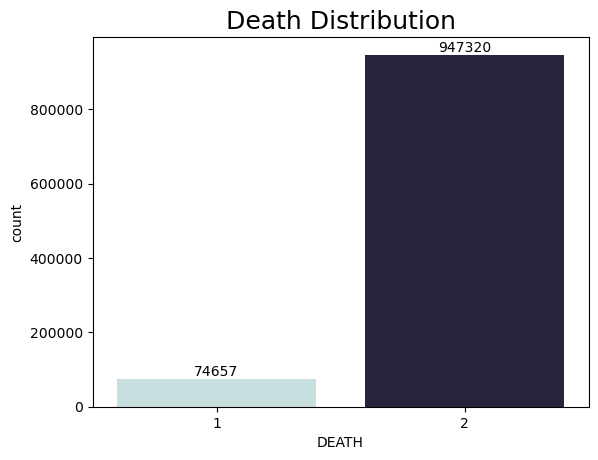

In [35]:
ax = sns.countplot(x=covid['DEATH'],palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title('Death Distribution', fontsize=18)

- There is an imbalance Dataset Problem

**How To Solve Imbalance Dataset Problem**
* Loading More Datas
* Changing The Perfomance Metrics
* Resampling (Undersampling or Oversampling)
* Changing The Algorithm
* Penalized Models etc.

# Undersampling data

In [36]:
rus = RandomUnderSampler(random_state=0)
x_resampled,y_resampled = rus.fit_resample(X,y)

Text(0.5, 1.0, 'Death Distribution After Resampling')

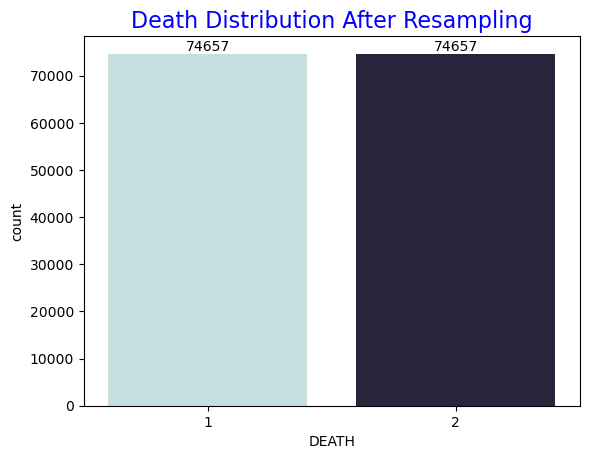

In [37]:
ax = sns.countplot(x=y_resampled,palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title("Death Distribution After Resampling", fontsize=16, color='b')

# Methods

## Train Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (119451, 25)
X_test:  (29863, 25)
y_train:  (119451,)
y_test:  (29863,)


## Decision Tree

### Training Model

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.93      0.87      0.90     15843
           2       0.87      0.93      0.90     14020

    accuracy                           0.90     29863
   macro avg       0.90      0.90      0.90     29863
weighted avg       0.90      0.90      0.90     29863



Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

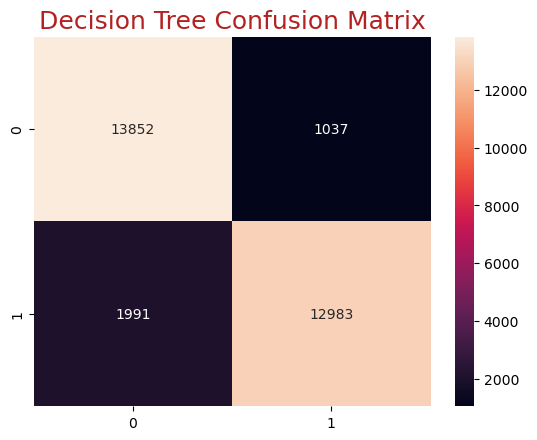

In [40]:
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test)), annot=True, fmt='.0f')
plt.title("Decision Tree Confusion Matrix", fontsize=18, color='firebrick')

### K Fold Cross Validation

In [41]:
acc=cross_val_score(estimator=dt,X=x_resampled,y=y_resampled,cv=5)
acc_dt_before = np.mean(acc)
print("Average accuracy: ", acc_dt_before)
pres=cross_val_score(estimator=dt,X=x_resampled,y=y_resampled,cv=5, scoring='precision')
pres_dt_before = np.mean(pres)
print("Average precision: ", pres_dt_before)
recall=cross_val_score(estimator=dt,X=x_resampled,y=y_resampled,cv=5, scoring='recall')
recall_dt_before = np.mean(recall)
print("Average recall: ", recall_dt_before)
f1=cross_val_score(estimator=dt,X=x_resampled,y=y_resampled,cv=5, scoring='f1')
f1_dt_before = np.mean(f1)
print("Average F1: ", f1_dt_before)

Average accuracy:  0.8526461793903364
Average precision:  0.8651197203390589
Average recall:  0.8345619827095343
Average F1:  0.8466976233912422


### Grid Search Cross Validation with Decision Tree

In [42]:
parameters = {'max_depth':np.arange(3,10),
              'min_samples_split': np.arange(3,10,1),
              'min_samples_leaf':np.arange(3,10),
              'max_leaf_nodes' : [8, 16, 32],
              'criterion': ('gini', 'entropy')}


start_time = time.time()
tree_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=parameters, scoring='accuracy', n_jobs=-1, verbose=3)
tree_grid.fit(X_train, y_train)
done_time = time.time() - start_time

Fitting 5 folds for each of 2058 candidates, totalling 10290 fits


In [43]:
print("Best params: ",tree_grid.best_params_)
print('Thời gian thực thi: {:.4f}s'.format(done_time))

Best params:  {'criterion': 'gini', 'max_depth': 8, 'max_leaf_nodes': 32, 'min_samples_leaf': 3, 'min_samples_split': 3}
Thời gian thực thi: 584.9264s


In [44]:
y_pred = tree_grid.predict(X_test)

acc_dt_after = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy: ", acc_dt_after)
pres_dt_after = precision_score(y_test, y_pred)
print("Decision Tree Precision: ", pres_dt_after)
recall_dt_after = recall_score(y_test, y_pred)
print("Decision Tree Recall: ", recall_dt_after)
f1_dt_after = f1_score(y_test, y_pred)
print("Decision Tree F1: ", f1_dt_after)
print('\n', classification_report(y_pred, y_test))

Decision Tree Accuracy:  0.9111609684224625
Decision Tree Precision:  0.8729578151670324
Decision Tree Recall:  0.9617838672845725
Decision Tree F1:  0.9152206563768255

               precision    recall  f1-score   support

           1       0.96      0.87      0.92     16404
           2       0.86      0.96      0.91     13459

    accuracy                           0.91     29863
   macro avg       0.91      0.92      0.91     29863
weighted avg       0.92      0.91      0.91     29863



Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

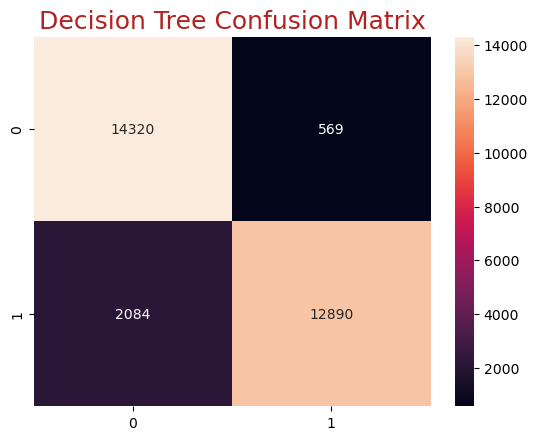

In [45]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.title("Decision Tree Confusion Matrix", fontsize=18, color='firebrick')

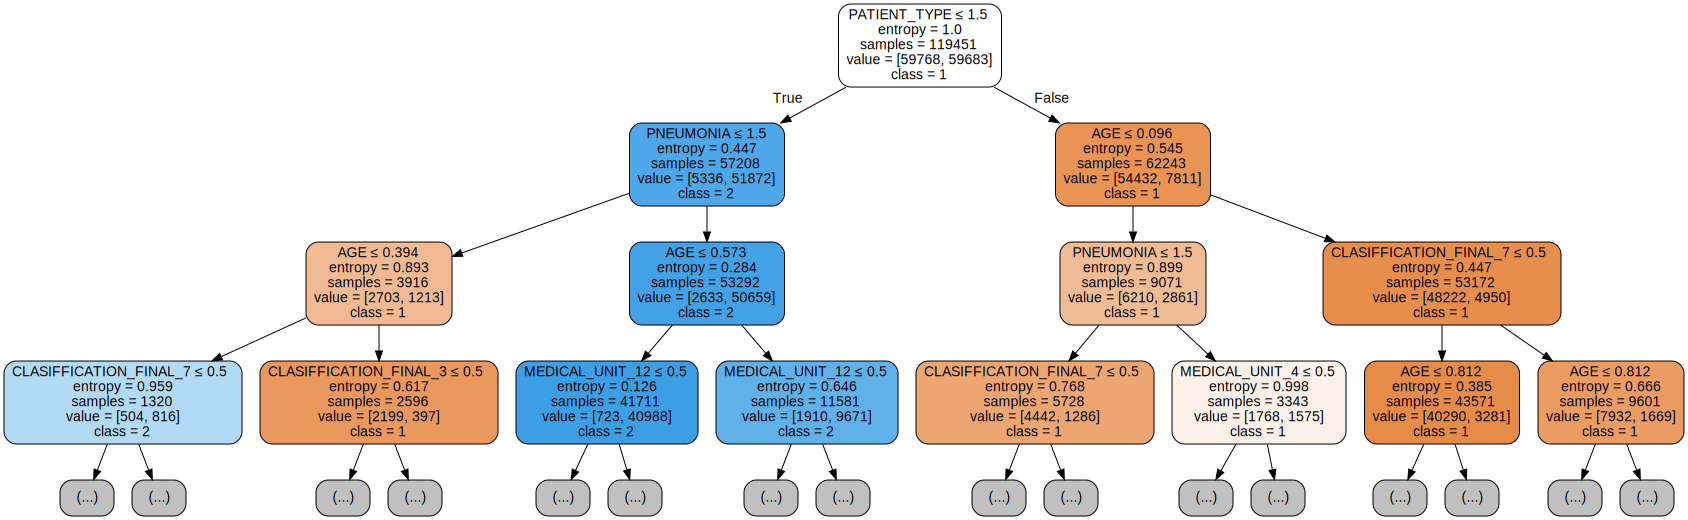

In [46]:
dt=DecisionTreeClassifier(criterion= 'entropy', max_depth= 9, min_samples_leaf= 5, min_samples_split= 6)
dt.fit(X_train,y_train)

feature_names = X_train.columns
dot_data = tree.export_graphviz(dt, out_file=None, max_depth=3, feature_names=feature_names, class_names=['1', '2'], filled=True, rounded=True, special_characters=True)  
graphviz.Source(dot_data)  

## Gaussian Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.59      0.71     14889
           2       0.70      0.94      0.80     14974

    accuracy                           0.76     29863
   macro avg       0.80      0.76      0.76     29863
weighted avg       0.80      0.76      0.76     29863



Text(0.5, 1.0, 'Gaussian Naive Bayes Confusion Matrix')

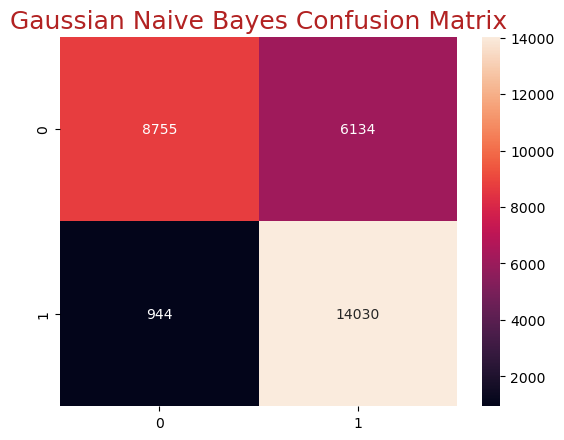

In [48]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f")
plt.title("Gaussian Naive Bayes Confusion Matrix", fontsize=18, color="firebrick")

### K Fold Cross Validation

In [49]:
acc=cross_val_score(estimator=GNB,X=x_resampled,y=y_resampled,cv=5)
acc_GNB_before = np.mean(acc)
print("Average accuracy: ", acc_GNB_before)
pres=cross_val_score(estimator=GNB,X=x_resampled,y=y_resampled,cv=5, scoring='precision')
pres_GNB_before = np.mean(pres)
print("Average precision: ", pres_GNB_before)
recall=cross_val_score(estimator=GNB,X=x_resampled,y=y_resampled,cv=5, scoring='recall')
recall_GNB_before = np.mean(recall)
print("Average recall: ", recall_GNB_before)
f1=cross_val_score(estimator=GNB,X=x_resampled,y=y_resampled,cv=5, scoring='f1')
f1_GNB_before = np.mean(f1)
print("Average F1: ", f1_GNB_before)

Average accuracy:  0.7303608322939217
Average precision:  0.7736947079929055
Average recall:  0.7501388779671425
Average F1:  0.7439599116856738


### Grid Search Cross Validation

In [50]:
folds_after = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=100)
parameters_after = {'var_smoothing': np.logspace(0, -9, num=100)}

GNB_after = GaussianNB()
GS_NB_after = GridSearchCV(estimator=GNB_after, 
                     param_grid=parameters_after, 
                     cv=folds_after,
                     verbose=3,
                     n_jobs=-1,
                     scoring='accuracy')

GS_NB_after.fit(X_train, y_train)

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=100),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.579...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=3)

In [51]:
print("Our model looks after hyper-parameter tuning")
print(GS_NB_after.best_estimator_)
print("Best parameters set found on development set:")
print(GS_NB_after.best_params_)
print("Grid best score:")
print(GS_NB_after.best_score_)

Our model looks after hyper-parameter tuning
GaussianNB(var_smoothing=0.04328761281083057)
Best parameters set found on development set:
{'var_smoothing': 0.04328761281083057}
Grid best score:
0.9002737522561962


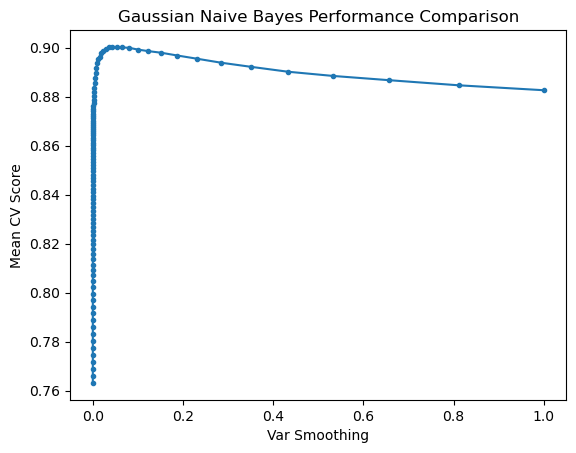

In [52]:
results_NB_after = pd.DataFrame(GS_NB_after.cv_results_['params'])
results_NB_after['test_score'] = GS_NB_after.cv_results_['mean_test_score']

plt.plot(results_NB_after['var_smoothing'], results_NB_after['test_score'], marker = '.')    
plt.xlabel('Var Smoothing')
plt.ylabel("Mean CV Score")
plt.title("Gaussian Naive Bayes Performance Comparison")
plt.show()

In [53]:
y_pred = GS_NB_after.predict(X_test)

acc_GNB_after = accuracy_score(y_test, y_pred)
print("Gaussian Naive Bayes Accuracy: ", acc_GNB_after)
pres_GNB_after = precision_score(y_test, y_pred)
print("Gaussian Naive Bayes Precision: ", pres_GNB_after)
recall_GNB_after = recall_score(y_test, y_pred)
print("Gaussian Naive Bayes Recall: ", recall_GNB_after)
f1_GNB_after = f1_score(y_test, y_pred)
print("Gaussian Naive Bayes F1: ", f1_GNB_after)
print('\n', classification_report(y_test, y_pred))

Gaussian Naive Bayes Accuracy:  0.8962595854401768
Gaussian Naive Bayes Precision:  0.8912855910267472
Gaussian Naive Bayes Recall:  0.9019410302908187
Gaussian Naive Bayes F1:  0.8965816530912004

               precision    recall  f1-score   support

           1       0.89      0.90      0.90     14889
           2       0.90      0.89      0.90     14974

    accuracy                           0.90     29863
   macro avg       0.90      0.90      0.90     29863
weighted avg       0.90      0.90      0.90     29863



Text(0.5, 1.0, 'Gaussian Naive Bayes after tuning Confusion Matrix')

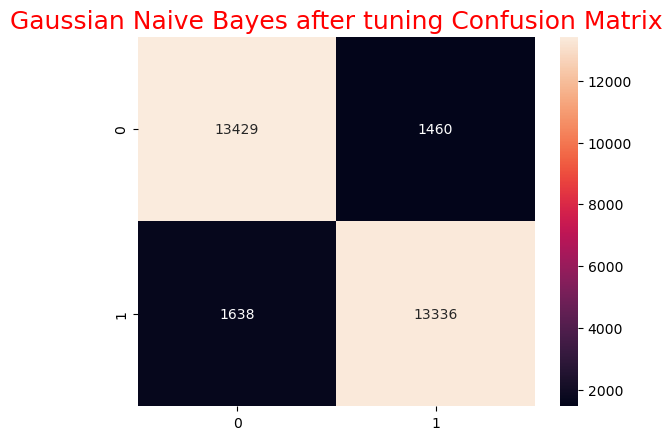

In [54]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f")
plt.title("Gaussian Naive Bayes after tuning Confusion Matrix", fontsize=18, color="red")

## Bernoulli Naive Bayes

In [55]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
y_pred = BNB.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.84      0.78     14889
           2       0.82      0.69      0.75     14974

    accuracy                           0.77     29863
   macro avg       0.77      0.77      0.77     29863
weighted avg       0.77      0.77      0.77     29863



Text(0.5, 1.0, 'Bernoulli Naive Bayes Confusion Matrix')

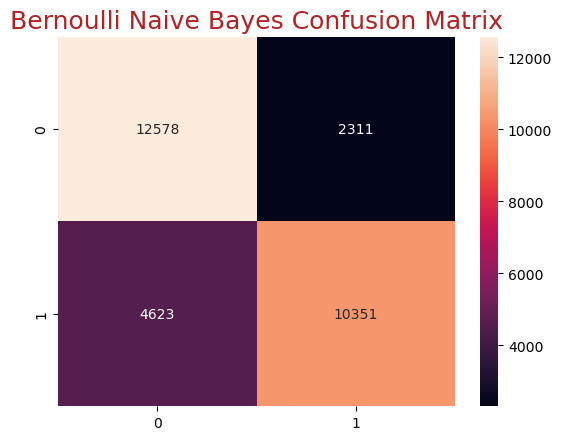

In [56]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f")
plt.title("Bernoulli Naive Bayes Confusion Matrix", fontsize=18, color="firebrick")

### K Fold Cross Validation

In [57]:
acc=cross_val_score(estimator=BNB,X=x_resampled,y=y_resampled,cv=5)
acc_BNB_before = np.mean(acc)
print("Average accuracy: ", acc_BNB_before)
pres=cross_val_score(estimator=BNB,X=x_resampled,y=y_resampled,cv=5, scoring='precision')
pres_BNB_before = np.mean(pres)
print("Average precision: ", pres_BNB_before)
recall=cross_val_score(estimator=BNB,X=x_resampled,y=y_resampled,cv=5, scoring='recall')
recall_BNB_before = np.mean(recall)
print("Average recall: ", recall_BNB_before)
f1=cross_val_score(estimator=BNB,X=x_resampled,y=y_resampled,cv=5, scoring='f1')
f1_BNB_before = np.mean(f1)
print("Average F1: ", f1_BNB_before)

Average accuracy:  0.6475732341804705
Average precision:  0.5828800806313436
Average recall:  0.5562985689166147
Average F1:  0.5632915664461844


### Grid Search Cross Validation

In [58]:
folds_after = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
parameters_after = {'alpha': np.linspace(0, 100, num=200)}
BNB_after = BernoulliNB()
B_NB_after = GridSearchCV(estimator=BNB_after, 
                     param_grid=parameters_after, 
                     cv=folds_after,
                     verbose=3,
                     n_jobs=-1,
                     scoring='accuracy')

B_NB_after.fit(X_train, y_train)

Fitting 15 folds for each of 200 candidates, totalling 3000 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=100),
             estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': array([  0.        ,   0.50251256,   1.00502513,   1.50753769,
         2.01005025,   2.51256281,   3.01507538,   3.51758794,
         4.0201005 ,   4.52261307,   5.02512563,   5.52763819,
         6.03015075,   6.53266332,   7.03517588,   7.53768844,
         8.04020101,   8.54271357,   9.04522613,   9.547738...
        86.4321608 ,  86.93467337,  87.43718593,  87.93969849,
        88.44221106,  88.94472362,  89.44723618,  89.94974874,
        90.45226131,  90.95477387,  91.45728643,  91.95979899,
        92.46231156,  92.96482412,  93.46733668,  93.96984925,
        94.47236181,  94.97487437,  95.47738693,  95.9798995 ,
        96.48241206,  96.98492462,  97.48743719,  97.98994975,
        98.49246231,  98.99497487,  99.49748744, 100.        ])},
             scoring='accuracy', verbose=3)

In [59]:
print("Our model looks after hyper-parameter tuning")
print(B_NB_after.best_estimator_)
print("Best parameters set found on development set:")
print(B_NB_after.best_params_)
print("Grid best score:")
print(B_NB_after.best_score_)

Our model looks after hyper-parameter tuning
BernoulliNB(alpha=47.23618090452261)
Best parameters set found on development set:
{'alpha': 47.23618090452261}
Grid best score:
0.7692470877674596


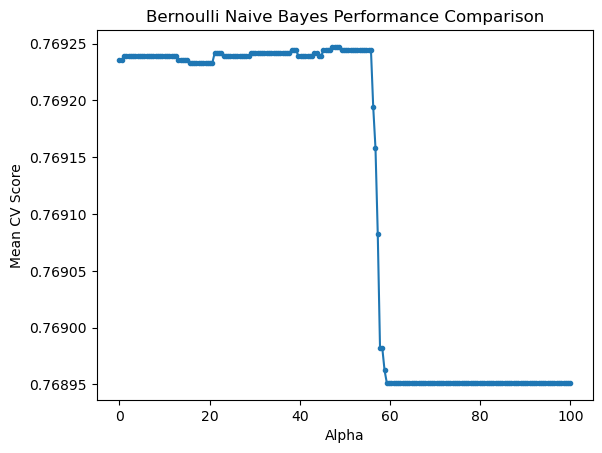

In [60]:
results_NB_after = pd.DataFrame(B_NB_after.cv_results_['params'])
results_NB_after['test_score'] = B_NB_after.cv_results_['mean_test_score']

plt.plot(results_NB_after['alpha'], results_NB_after['test_score'], marker = '.')    
plt.xlabel('Alpha')
plt.ylabel("Mean CV Score")
plt.title("Bernoulli Naive Bayes Performance Comparison")
plt.show()

In [61]:
y_pred = B_NB_after.predict(X_test)

acc_BNB_after = accuracy_score(y_test, y_pred)
print("Bernoulli Naive Bayes Accuracy: ", acc_BNB_after)
pres_BNB_after = precision_score(y_test, y_pred)
print("Bernoulli Naive Bayes Precision: ", pres_BNB_after)
recall_BNB_after = recall_score(y_test, y_pred)
print("Bernoulli Naive Bayes Recall: ", recall_BNB_after)
f1_BNB_after = f1_score(y_test, y_pred)
print("Bernoulli Naive Bayes F1: ", f1_BNB_after)
print('\n', classification_report(y_test, y_pred))

Bernoulli Naive Bayes Accuracy:  0.767839801761377
Bernoulli Naive Bayes Precision:  0.7312521799790722
Bernoulli Naive Bayes Recall:  0.844851904090268
Bernoulli Naive Bayes F1:  0.7839581190988126

               precision    recall  f1-score   support

           1       0.73      0.84      0.78     14889
           2       0.82      0.69      0.75     14974

    accuracy                           0.77     29863
   macro avg       0.77      0.77      0.77     29863
weighted avg       0.77      0.77      0.77     29863



## K-NN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.93      0.88      0.91     15743
           2       0.88      0.93      0.90     14120

    accuracy                           0.90     29863
   macro avg       0.90      0.91      0.90     29863
weighted avg       0.91      0.90      0.90     29863



Text(0.5, 1.0, 'K-NN Confusion Matrix')

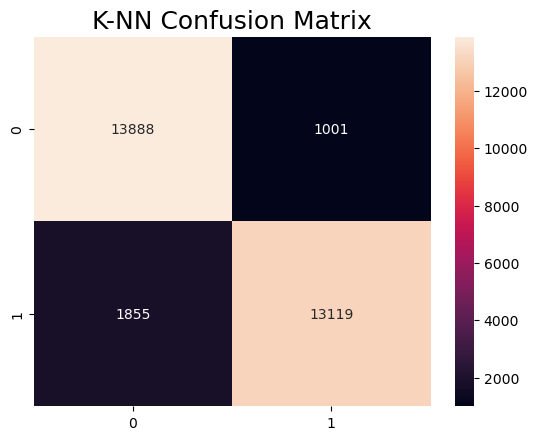

In [63]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.title("K-NN Confusion Matrix", fontsize=18)

### K Fold Cross Validation

In [64]:
acc=cross_val_score(estimator=knn,X=x_resampled,y=y_resampled,cv=5)
acc_knn_before = np.mean(acc)
print("Average accuracy: ", acc_knn_before)
pres=cross_val_score(estimator=knn,X=x_resampled,y=y_resampled,cv=5, scoring='precision')
pres_knn_before = np.mean(pres)
print("Average precision: ", pres_knn_before)
recall=cross_val_score(estimator=knn,X=x_resampled,y=y_resampled,cv=5, scoring='recall')
recall_knn_before = np.mean(recall)
print("Average recall: ", recall_knn_before)
f1=cross_val_score(estimator=knn,X=x_resampled,y=y_resampled,cv=5, scoring='f1')
f1_knn_before = np.mean(f1)
print("Average F1: ", f1_knn_before)

Average accuracy:  0.8362378672126519
Average precision:  0.8138465283523779
Average recall:  0.8691602821321682
Average F1:  0.838614566860374


### Grid Search Cross Validation

In [65]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 30))
weight_options = ['uniform', 'distance']
distance_metric = ['euclidean', 'manhattan']
param_grid = dict(n_neighbors=k_range, weights=weight_options, metric=distance_metric)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}


In [66]:
knn_grid = GridSearchCV(knn, param_grid, scoring='accuracy', return_train_score=False)
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [67]:
pd.DataFrame(knn_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.864162,0.002593,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei..."
1,0.864162,0.002593,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei..."
2,0.889469,0.002621,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei..."
3,0.885225,0.002725,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei..."
4,0.899850,0.001277,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei..."
...,...,...,...
111,0.906196,0.002016,"{'metric': 'manhattan', 'n_neighbors': 27, 'we..."
112,0.915003,0.001206,"{'metric': 'manhattan', 'n_neighbors': 28, 'we..."
113,0.906229,0.002052,"{'metric': 'manhattan', 'n_neighbors': 28, 'we..."
114,0.914768,0.001185,"{'metric': 'manhattan', 'n_neighbors': 29, 'we..."


In [68]:
grid_mean_scores = knn_grid.cv_results_['mean_test_score']
print(grid_mean_scores) 

[0.86416184 0.86416184 0.88946931 0.88522488 0.89985013 0.89521224
 0.90704974 0.90032732 0.90693253 0.90028545 0.91050722 0.90302298
 0.90995468 0.90280531 0.91242432 0.90429546 0.91199737 0.90406105
 0.91319451 0.90468054 0.91293499 0.90463869 0.91412376 0.90495681
 0.91380564 0.90487309 0.91413213 0.9051075  0.91393122 0.90500704
 0.91440002 0.90516611 0.91413213 0.90523308 0.91489395 0.90540888
 0.91474326 0.90545074 0.9148521  0.90540888 0.91468466 0.90535028
 0.91461769 0.90542562 0.91486047 0.90547585 0.91505301 0.90561817
 0.91499441 0.90555957 0.91513673 0.90557631 0.91486047 0.90556794
 0.91512836 0.90563491 0.91475164 0.90546748 0.86511621 0.86511621
 0.89064971 0.8867569  0.89951526 0.89550525 0.90677347 0.90077939
 0.90685719 0.90098867 0.91058257 0.90370108 0.91022258 0.90343318
 0.91243269 0.90483962 0.91224852 0.90477264 0.9135796  0.90540888
 0.91314428 0.90524982 0.91405678 0.90552608 0.9139061  0.90542563
 0.91440839 0.90576886 0.91409865 0.90570189 0.91471815 0.9059

In [69]:
print(knn_grid.best_score_)
print(knn_grid.best_params_)
print(knn_grid.best_estimator_)

0.9151367283942127
{'metric': 'euclidean', 'n_neighbors': 26, 'weights': 'uniform'}
KNeighborsClassifier(metric='euclidean', n_neighbors=26)


In [70]:
y_pred = knn_grid.predict(X_test)

acc_knn_after = accuracy_score(y_test, y_pred)
print("K-NN Accuracy: ", acc_knn_after)
pres_knn_after = precision_score(y_test, y_pred)
print("K-NN Precision: ", pres_knn_after)
recall_knn_after = recall_score(y_test, y_pred)
print("K-NN Recall: ", recall_knn_after)
f1_knn_after = f1_score(y_test, y_pred)
print("K-NN F1: ", f1_knn_after)
print('\n', classification_report(y_test, y_pred))

K-NN Accuracy:  0.912902253624887
K-NN Precision:  0.8818046234153617
K-NN Recall:  0.9530525891597824
K-NN F1:  0.9160453180981892

               precision    recall  f1-score   support

           1       0.88      0.95      0.92     14889
           2       0.95      0.87      0.91     14974

    accuracy                           0.91     29863
   macro avg       0.92      0.91      0.91     29863
weighted avg       0.92      0.91      0.91     29863



Text(0.5, 1.0, 'K-NN Confusion Matrix')

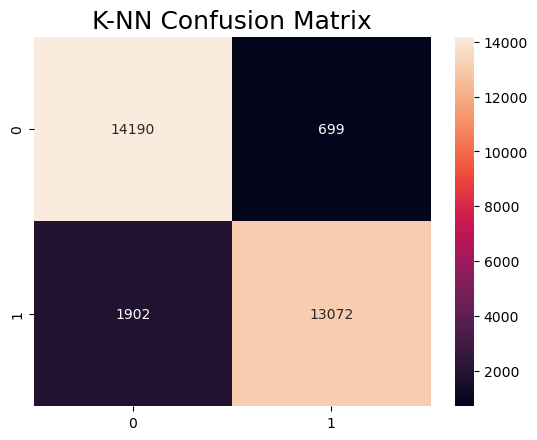

In [71]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.title("K-NN Confusion Matrix", fontsize=18)

# Visualize Comparision

## Compare before and after tunning parameters

In [72]:
score = ['Accuracy', 'Precision', 'Recall', 'F1']
Decision_Tree_before = [acc_dt_before, pres_dt_before, recall_dt_before, f1_dt_before]
Decision_Tree_after = [acc_dt_after, pres_dt_after, recall_dt_after, f1_dt_after]
Gaussian_Naive_Bayes_before = [acc_GNB_before, pres_GNB_before, recall_GNB_before, f1_GNB_before]
Gaussian_Naive_Bayes_after = [acc_GNB_after, pres_GNB_after, recall_GNB_after, f1_GNB_after]
Bernoulli_Naive_Bayes_before = [acc_BNB_before, pres_BNB_before, recall_BNB_before, f1_BNB_before]
Bernoulli_Naive_Bayes_after = [acc_BNB_after, pres_BNB_after, recall_BNB_after, f1_BNB_after]
KNN_before = [acc_knn_before, pres_knn_before, recall_knn_before, f1_knn_before]
KNN_after = [acc_knn_after, pres_knn_after, recall_knn_after, f1_knn_after]

blogs = pd.DataFrame({'score': score, 'Decision_Tree_before': Decision_Tree_before, 
                      'Decision_Tree_after': Decision_Tree_after, 'Gaussian_Naive_Bayes_before': Gaussian_Naive_Bayes_before,
                      'Gaussian_Naive_Bayes_after': Gaussian_Naive_Bayes_after, 'KNN_before': KNN_before, 'KNN_after': KNN_after,
                      'Bernoulli_Naive_Bayes_before': Bernoulli_Naive_Bayes_before, 'Bernoulli_Naive_Bayes_after': Bernoulli_Naive_Bayes_after})


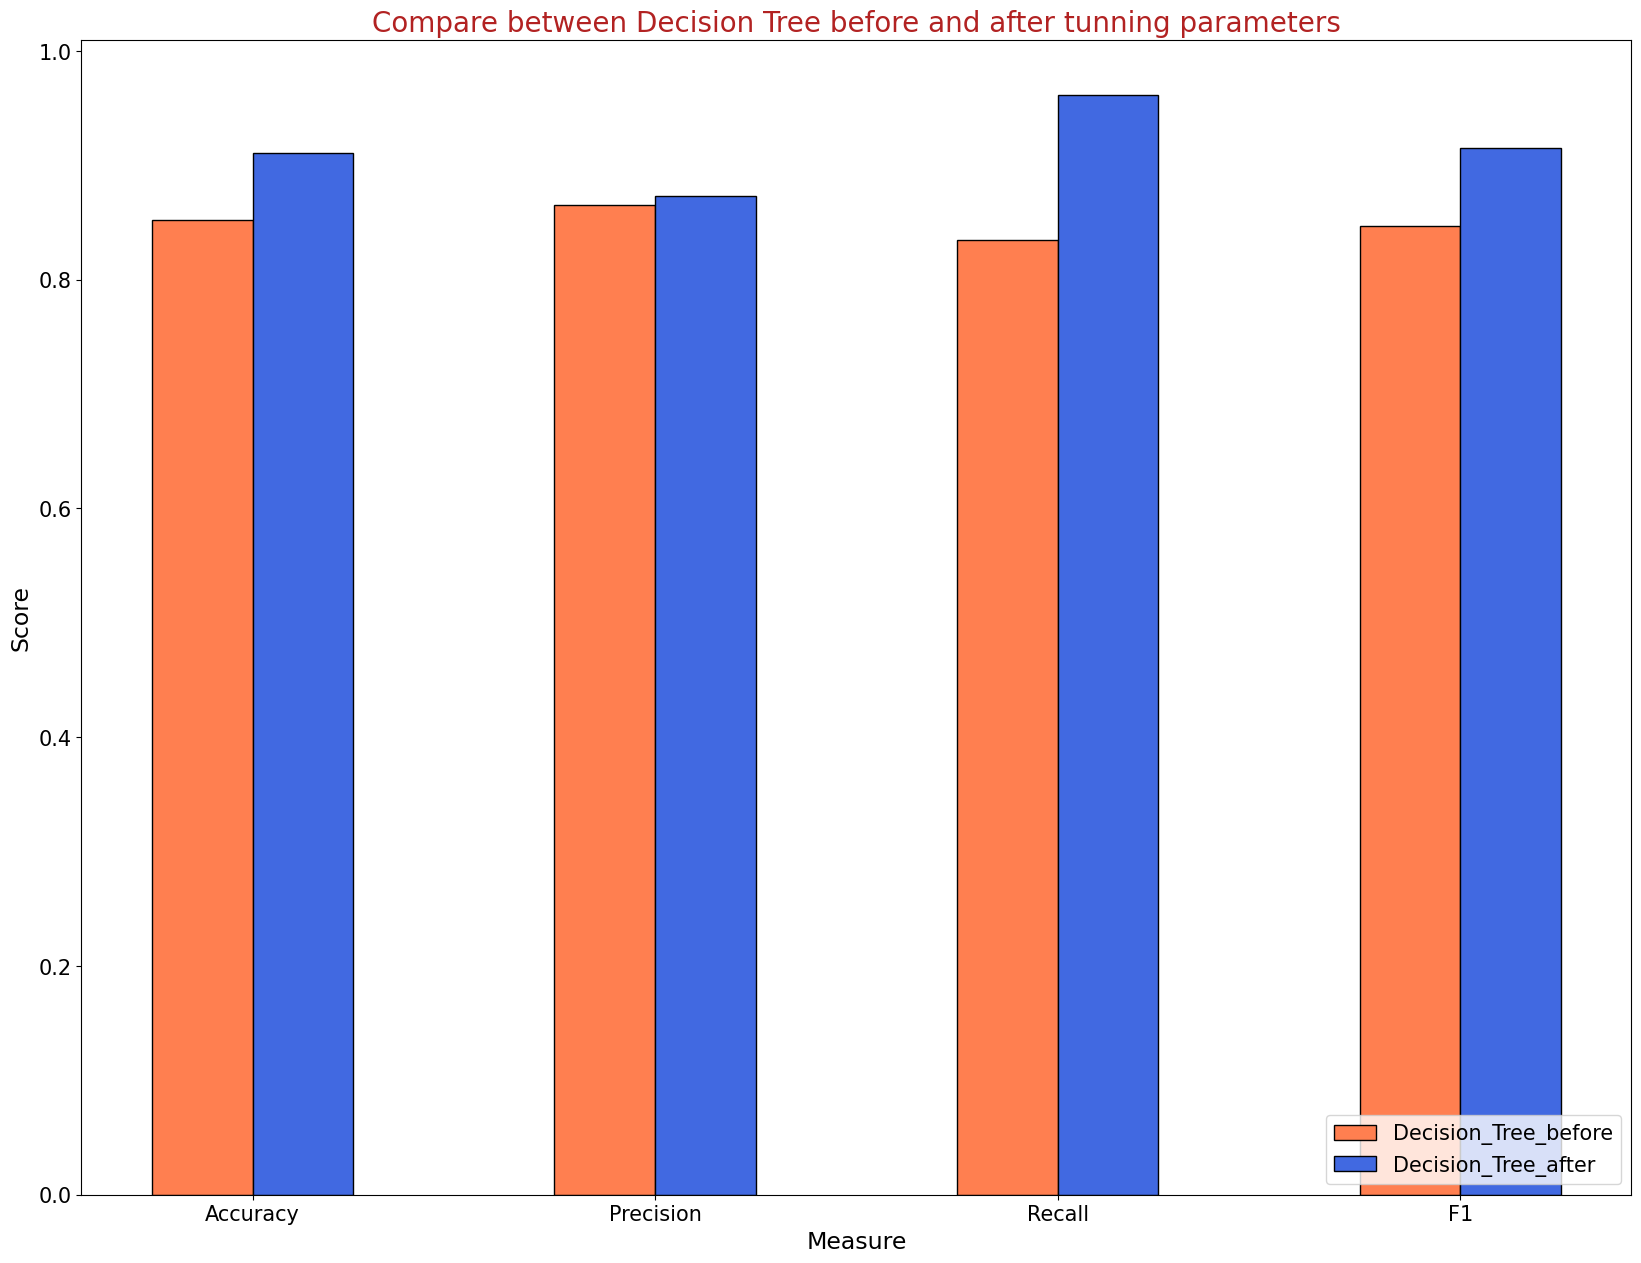

In [73]:
# Visualizing the data with multiple bar chart
plt.figure(figsize=[20, 15])

# Set the width of the bars
wd = 0.5
x_pos = np.arange(1, 2*len(blogs), 2)

# Plotting the multiple bar graphs on the same figure
plt.bar(x_pos, blogs.Decision_Tree_before, color='coral', width=wd, edgecolor='k',
        label='Decision_Tree_before')
plt.bar(x_pos+wd, blogs.Decision_Tree_after, color='royalblue', width=wd, edgecolor='k', 
        label='Decision_Tree_after')

# Add xticks
plt.xticks(x_pos+(wd*0.5), blogs.score.values, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Compare between Decision Tree before and after tunning parameters', fontsize=20, color='firebrick')
plt.xlabel('Measure', fontsize=17)
plt.ylabel('Score', fontsize=17)

plt.legend(loc='lower right', fontsize=15)
plt.show()

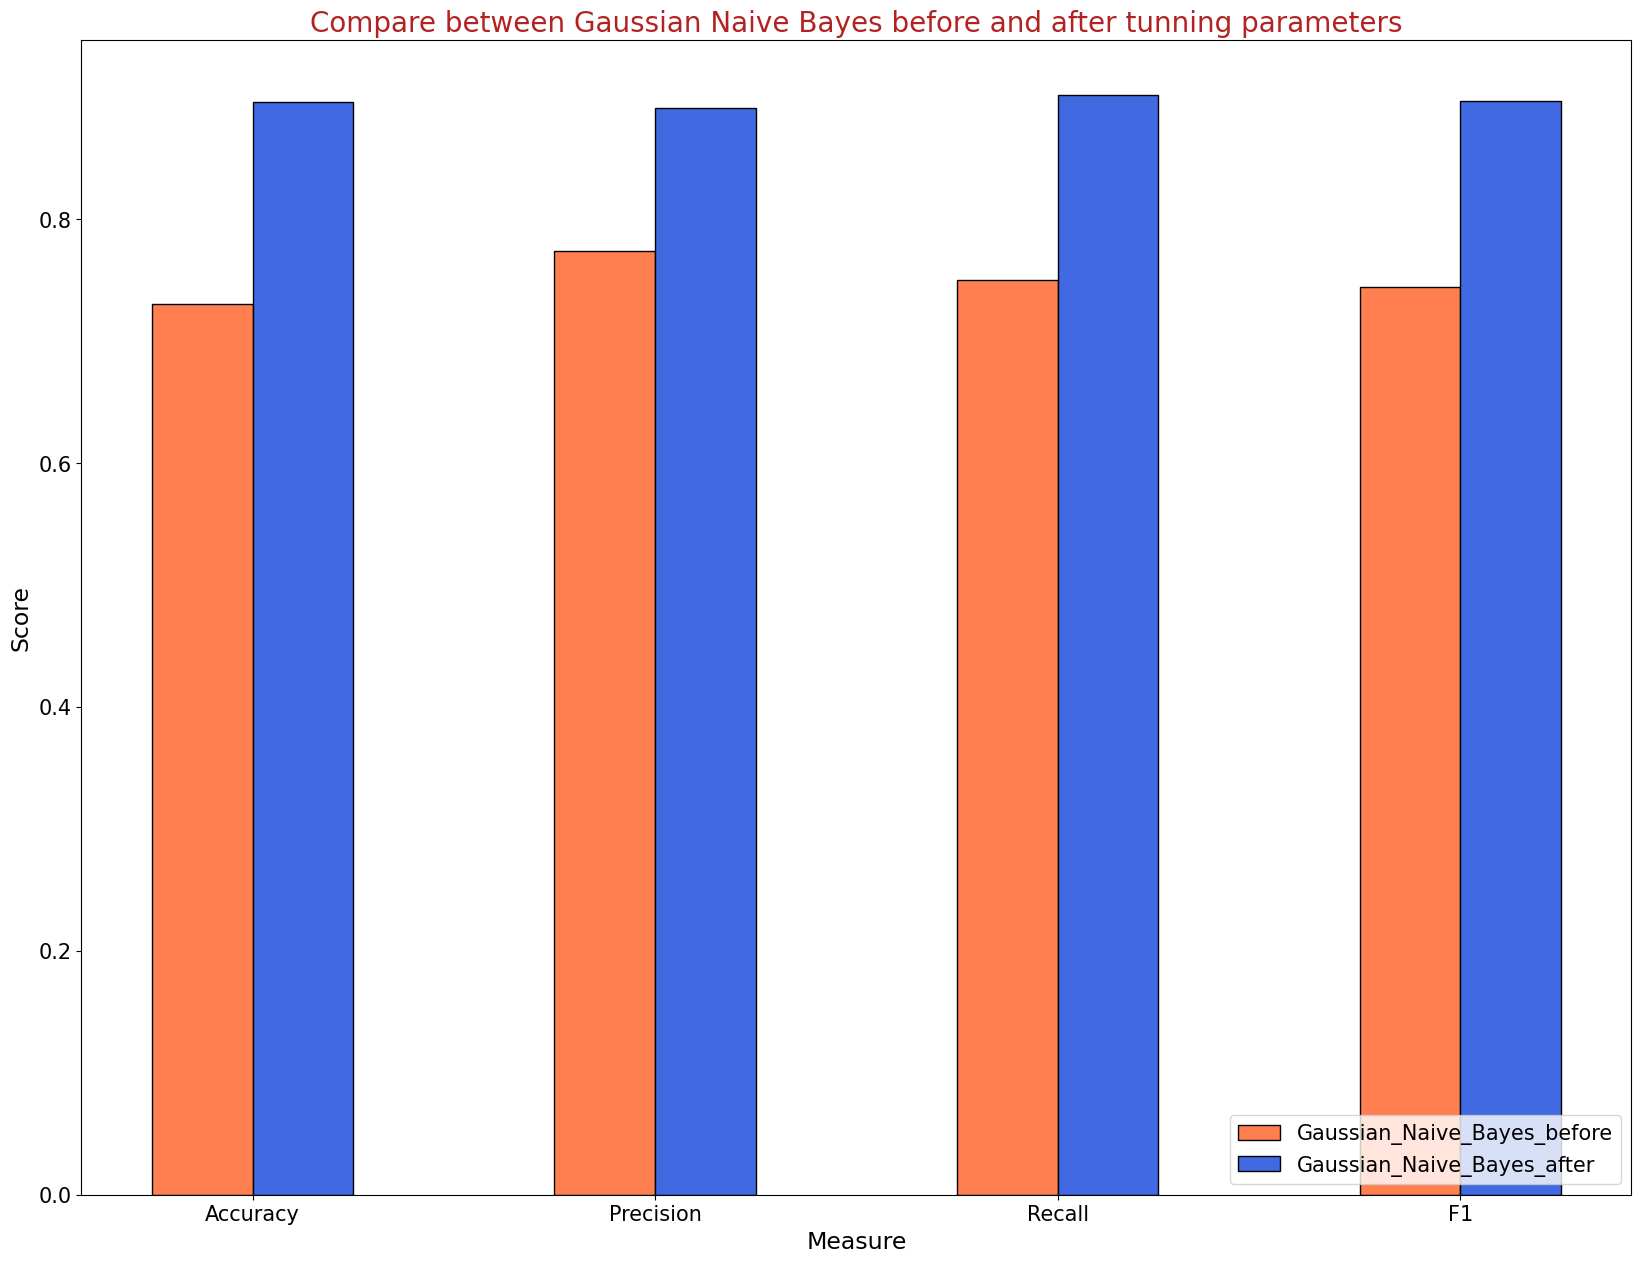

In [74]:
# Visualizing the data with multiple bar chart
plt.figure(figsize=[20, 15])

# Set the width of the bars
wd = 0.5
x_pos = np.arange(1, 2*len(blogs), 2)

# Plotting the multiple bar graphs on the same figure
plt.bar(x_pos, blogs.Gaussian_Naive_Bayes_before, color='coral', width=wd, edgecolor='k',
        label='Gaussian_Naive_Bayes_before')
plt.bar(x_pos+wd, blogs.Gaussian_Naive_Bayes_after, color='royalblue', width=wd, edgecolor='k', 
        label='Gaussian_Naive_Bayes_after')

# Add xticks
plt.xticks(x_pos+(wd*0.5), blogs.score.values, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Compare between Gaussian Naive Bayes before and after tunning parameters', fontsize=20, color='firebrick')
plt.xlabel('Measure', fontsize=17)
plt.ylabel('Score', fontsize=17)

plt.legend(loc='lower right', fontsize=15)
plt.show()

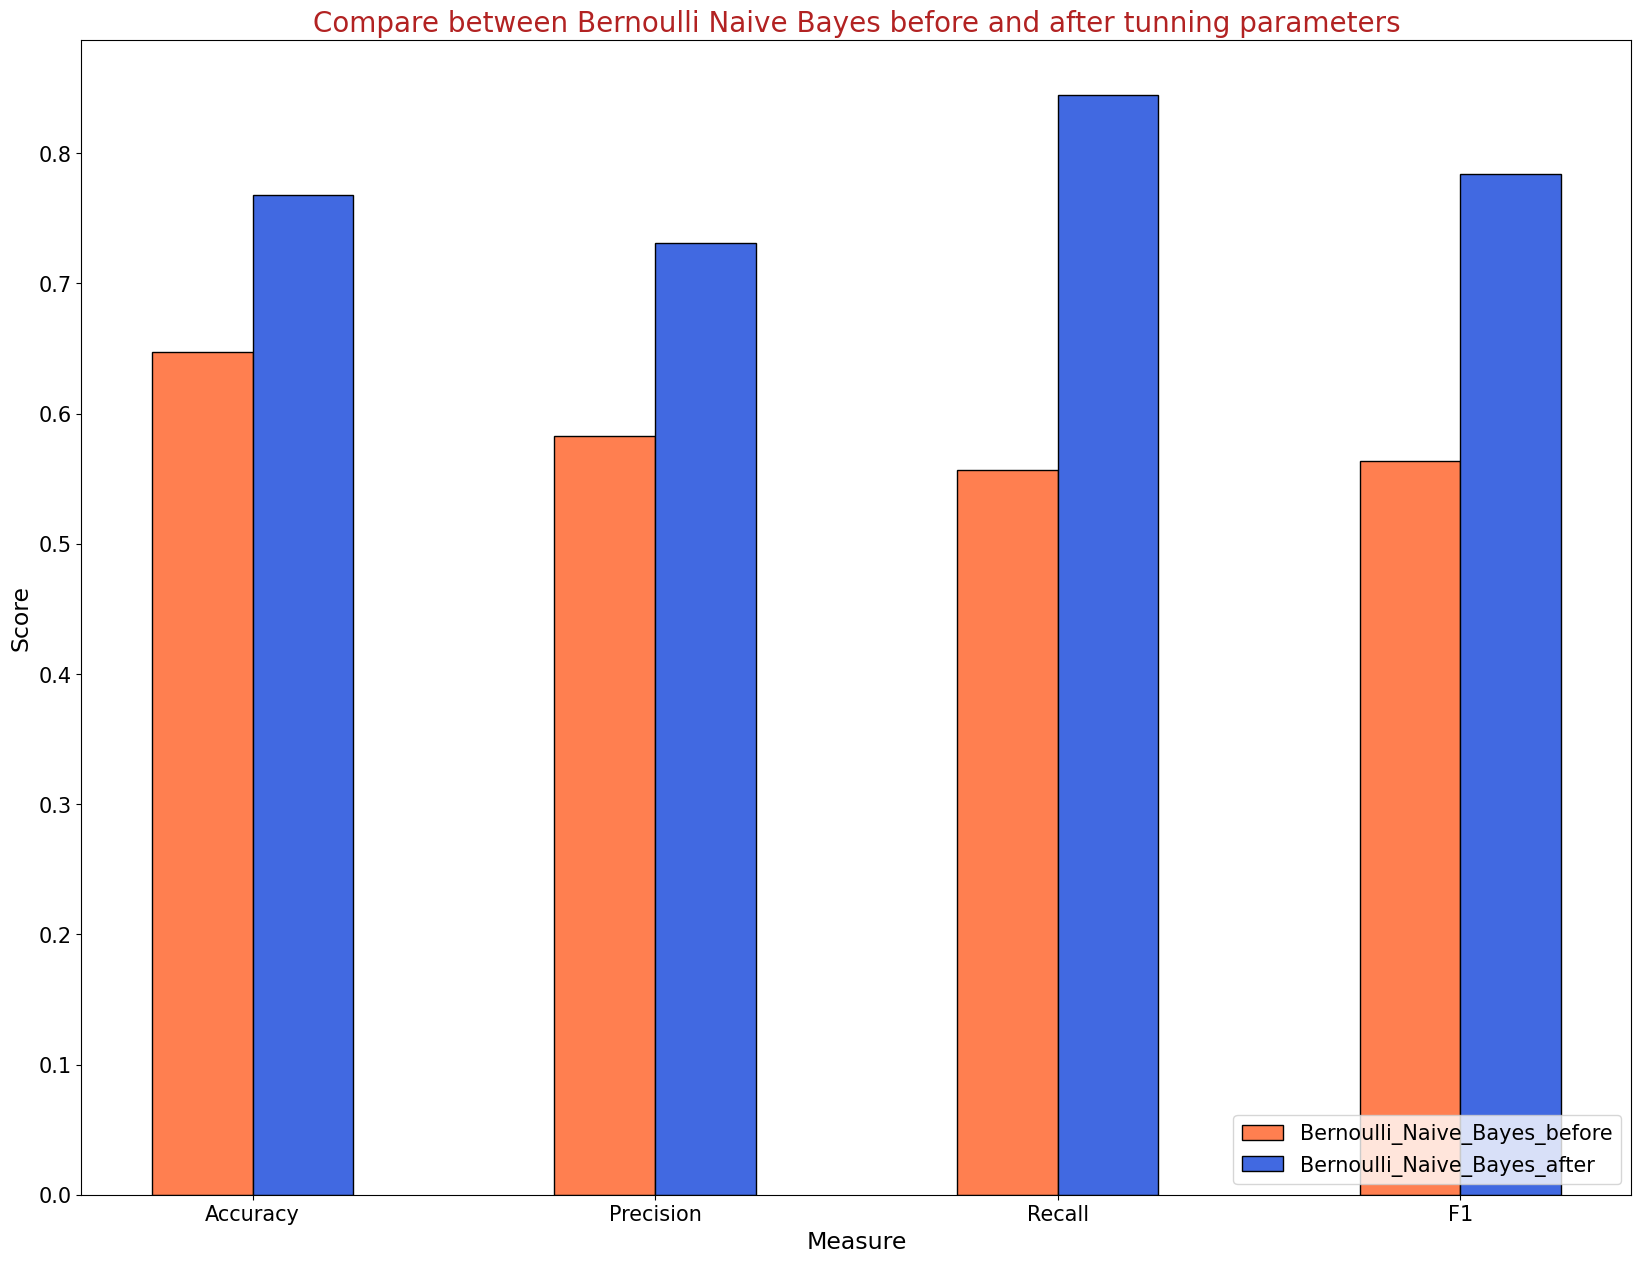

In [75]:
# Visualizing the data with multiple bar chart
plt.figure(figsize=[20, 15])

# Set the width of the bars
wd = 0.5
x_pos = np.arange(1, 2*len(blogs), 2)

# Plotting the multiple bar graphs on the same figure
plt.bar(x_pos, blogs.Bernoulli_Naive_Bayes_before, color='coral', width=wd, edgecolor='k',
        label='Bernoulli_Naive_Bayes_before')
plt.bar(x_pos+wd, blogs.Bernoulli_Naive_Bayes_after, color='royalblue', width=wd, edgecolor='k', 
        label='Bernoulli_Naive_Bayes_after')

# Add xticks
plt.xticks(x_pos+(wd*0.5), blogs.score.values, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Compare between Bernoulli Naive Bayes before and after tunning parameters', fontsize=20, color='firebrick')
plt.xlabel('Measure', fontsize=17)
plt.ylabel('Score', fontsize=17)

plt.legend(loc='lower right', fontsize=15)
plt.show()

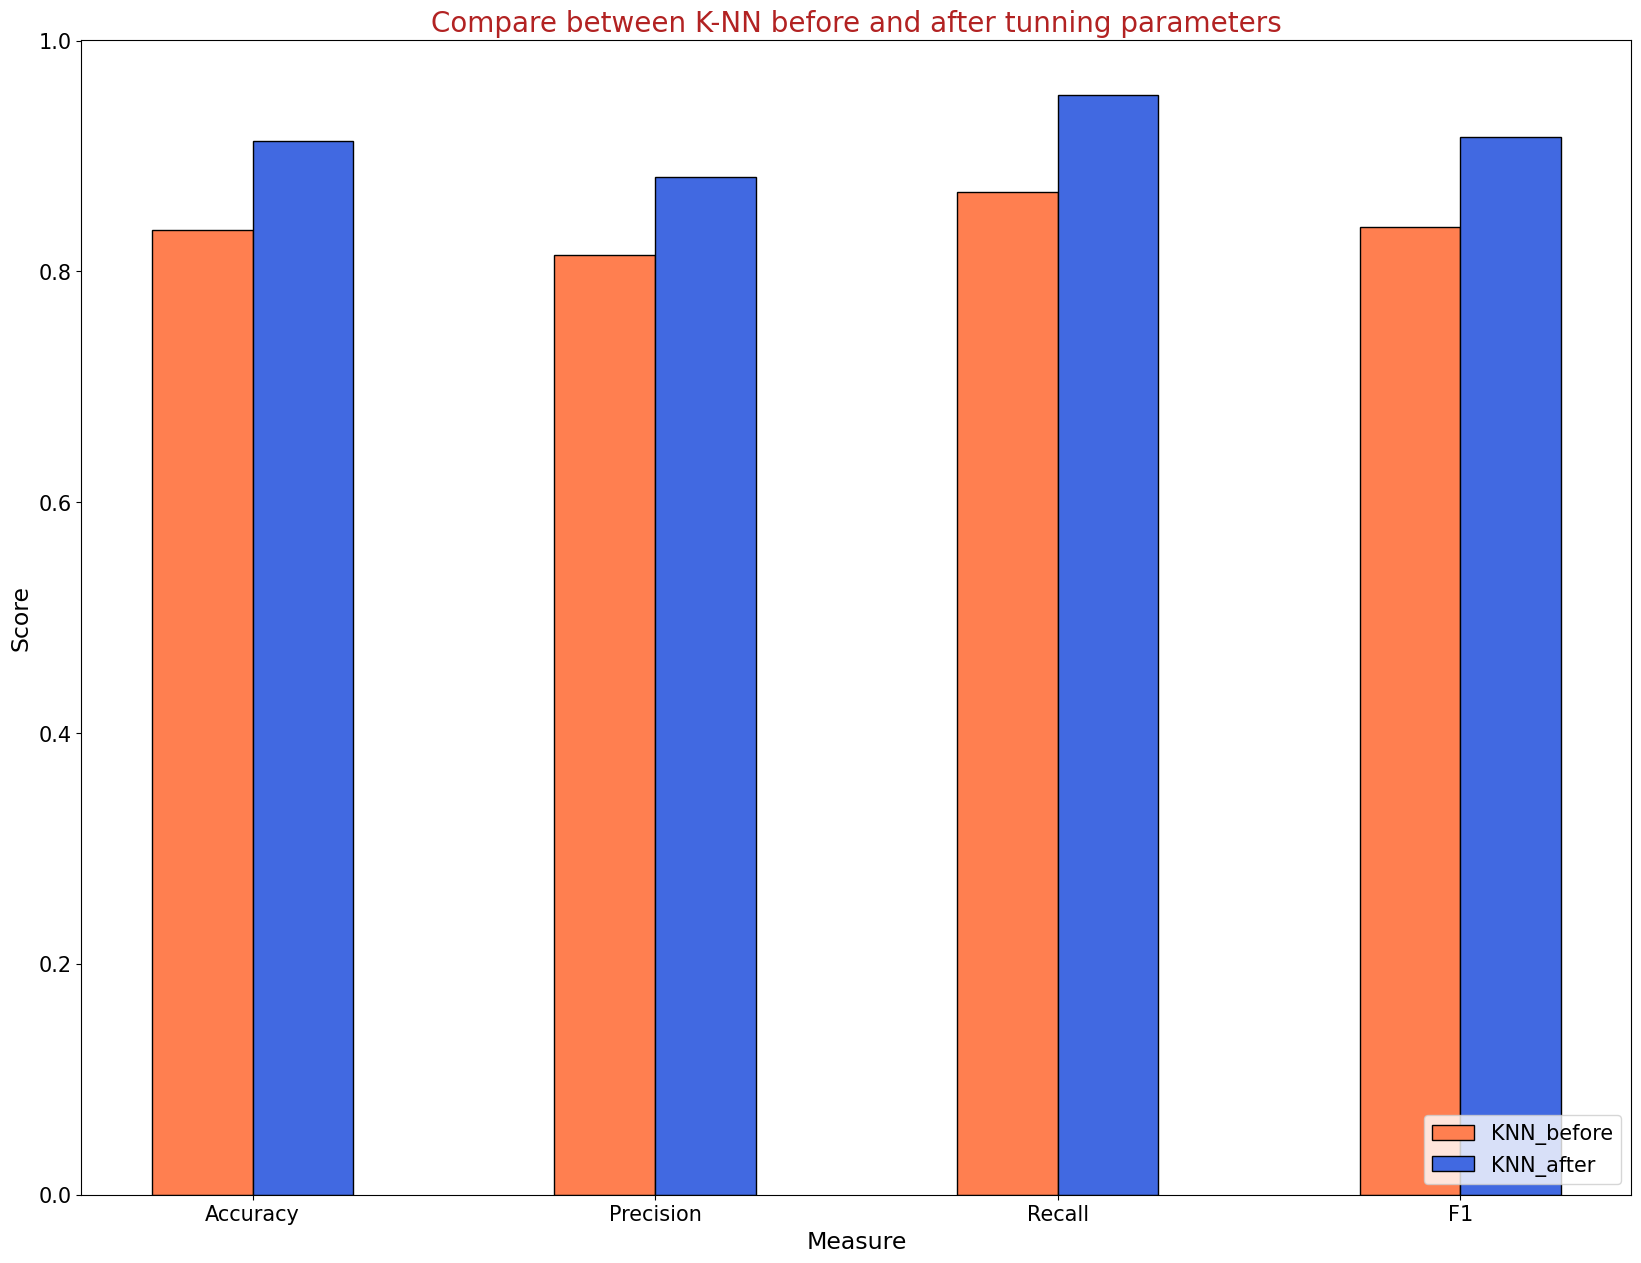

In [76]:
# Visualizing the data with multiple bar chart
plt.figure(figsize=[20, 15])

# Set the width of the bars
wd = 0.5
x_pos = np.arange(1, 2*len(blogs), 2)

# Plotting the multiple bar graphs on the same figure
plt.bar(x_pos, blogs.KNN_before, color='coral', width=wd, edgecolor='k',
        label='KNN_before')
plt.bar(x_pos+wd, blogs.KNN_after, color='royalblue', width=wd, edgecolor='k', 
        label='KNN_after')

# Add xticks
plt.xticks(x_pos+(wd*0.5), blogs.score.values, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Compare between K-NN before and after tunning parameters', fontsize=20, color='firebrick')
plt.xlabel('Measure', fontsize=17)
plt.ylabel('Score', fontsize=17)

plt.legend(loc='lower right', fontsize=15)
plt.show()

## Compare between methods

### Before tunning

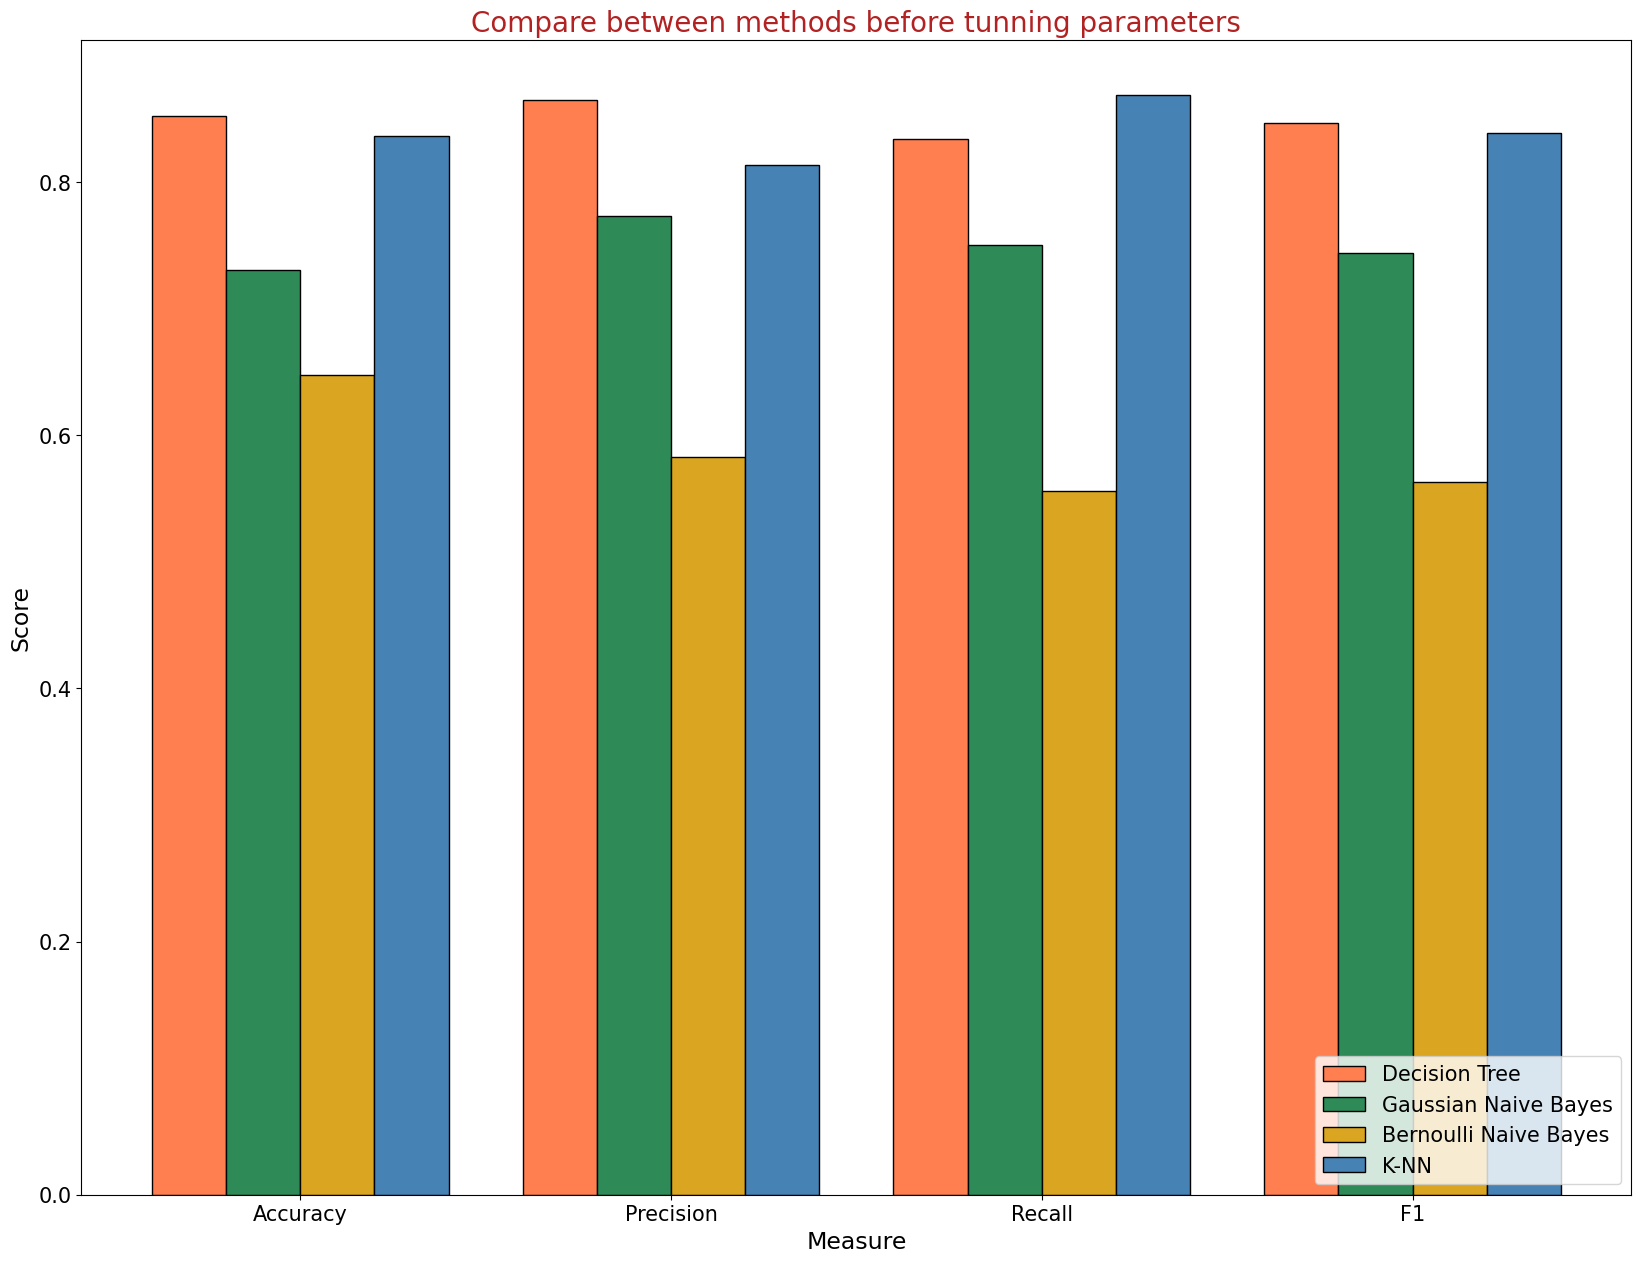

In [77]:
# Visualizing the data with multiple bar chart
plt.figure(figsize=[20, 15])

# Set the width of the bars
wd = 0.4
x_pos = np.arange(1, 2*len(blogs), 2)

# Plotting the multiple bar graphs on the same figure
plt.bar(x_pos, blogs.Decision_Tree_before, color='coral', width=wd, edgecolor='k',
        label='Decision Tree')
plt.bar(x_pos+wd, blogs.Gaussian_Naive_Bayes_before, color='seagreen', width=wd, edgecolor='k', 
        label='Gaussian Naive Bayes')
plt.bar(x_pos+(wd*2), blogs.Bernoulli_Naive_Bayes_before, color='goldenrod', width=wd, 
        edgecolor='k', label='Bernoulli Naive Bayes')
plt.bar(x_pos+(wd*3), blogs.KNN_before, color='steelblue', width=wd, 
        edgecolor='k', label='K-NN')

# Add xticks
plt.xticks(x_pos+(wd*1.5), blogs.score.values, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Compare between methods before tunning parameters', fontsize=20, color='firebrick')
plt.xlabel('Measure', fontsize=17)
plt.ylabel('Score', fontsize=17)

plt.legend(loc='lower right', fontsize=15)
plt.show()

### After tunning

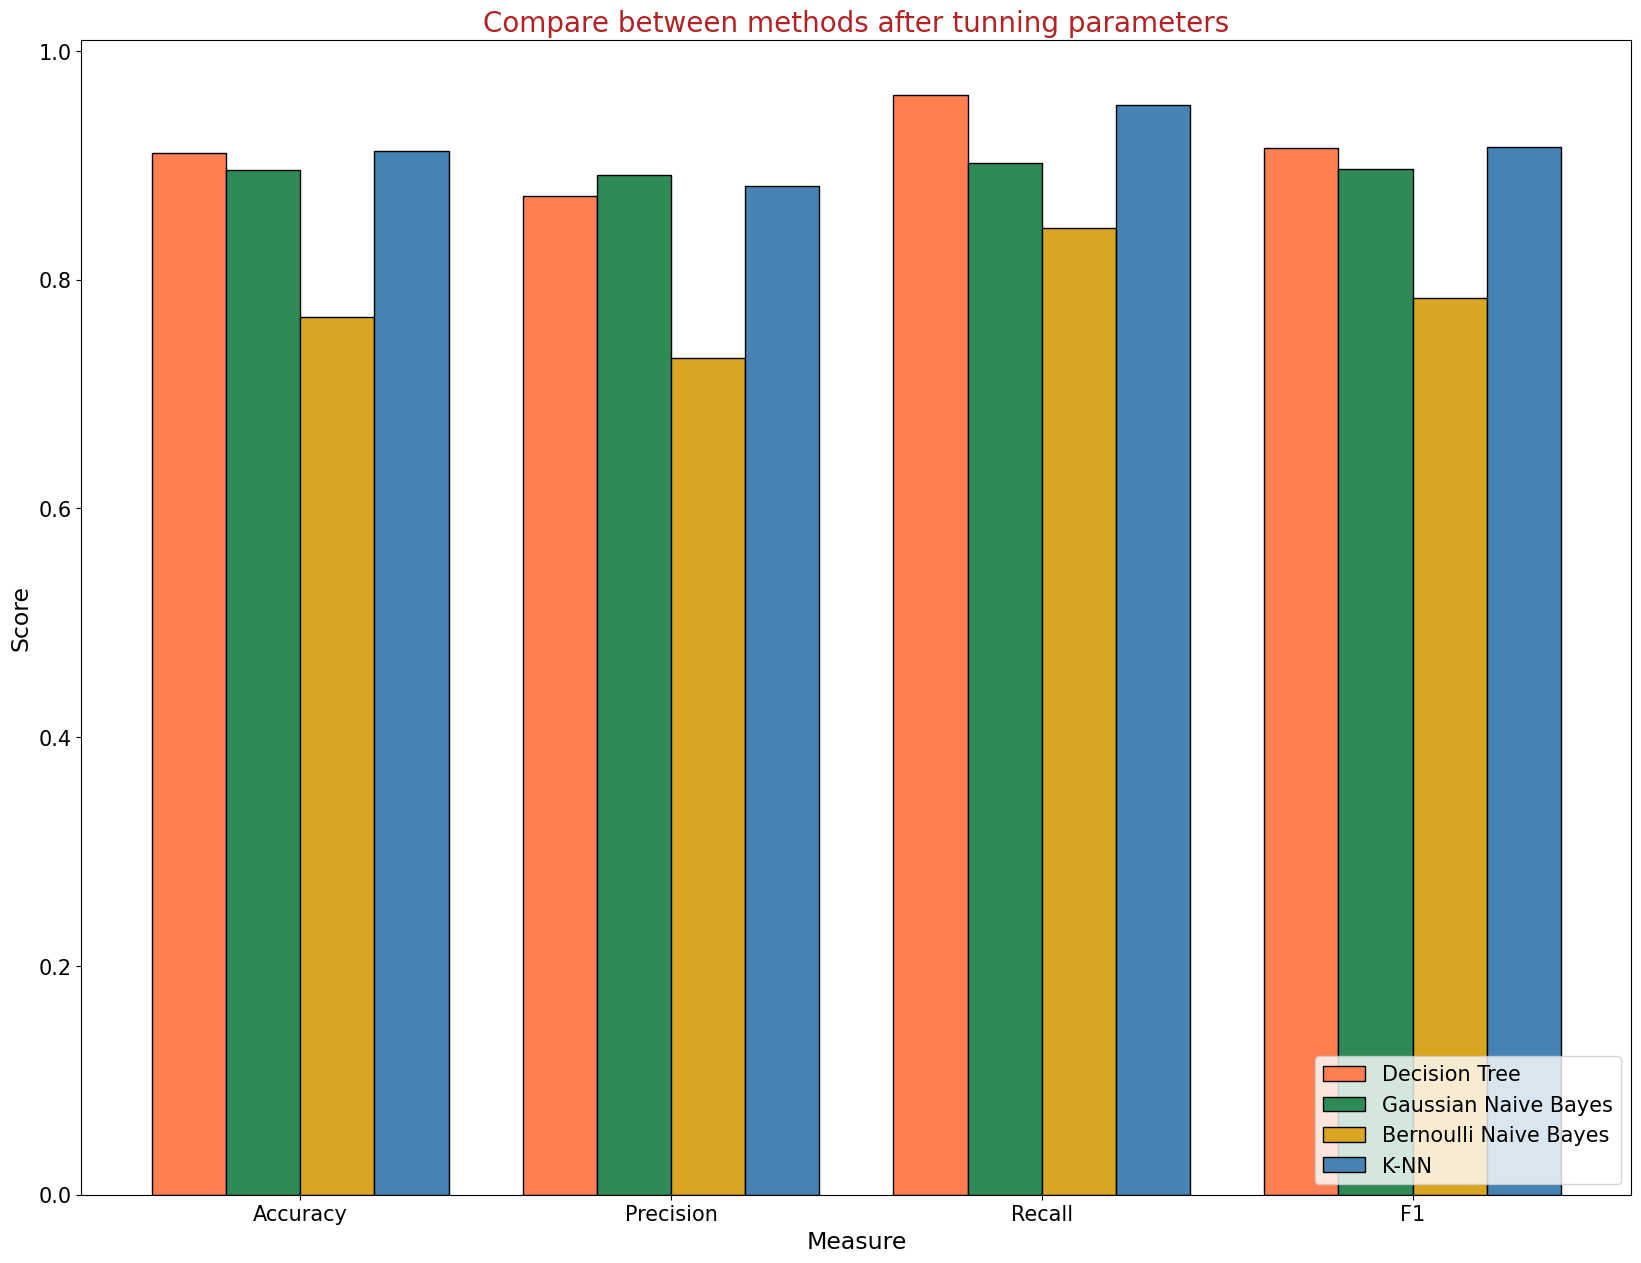

In [78]:
# Visualizing the data with multiple bar chart
plt.figure(figsize=[20, 15])

# Set the width of the bars
wd = 0.4
x_pos = np.arange(1, 2*len(blogs), 2)

# Plotting the multiple bar graphs on the same figure
plt.bar(x_pos, blogs.Decision_Tree_after, color='coral', width=wd, edgecolor='k',
        label='Decision Tree')
plt.bar(x_pos+wd, blogs.Gaussian_Naive_Bayes_after, color='seagreen', width=wd, edgecolor='k', 
        label='Gaussian Naive Bayes')
plt.bar(x_pos+(wd*2), blogs.Bernoulli_Naive_Bayes_after, color='goldenrod', width=wd, edgecolor='k',
        label='Bernoulli Naive Bayes')
plt.bar(x_pos+(wd*3), blogs.KNN_after, color='steelblue', width=wd, 
        edgecolor='k', label='K-NN')

# Add xticks
plt.xticks(x_pos+(wd*1.5), blogs.score.values, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Compare between methods after tunning parameters', fontsize=20, color='firebrick')
plt.xlabel('Measure', fontsize=17)
plt.ylabel('Score', fontsize=17)

plt.legend(loc='lower right', fontsize=15)
plt.show()